# Import Libraries

Include all necessary modules for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Read-In Data

We read the data in using the Pandas module for easy conversion from a CSV file format to an in-memory DataFrame.

Dataset from: http://insideairbnb.com/vancouver

In [2]:
airbnb_raw = pd.read_csv("../data/vancouver-listings.csv")
pd.set_option('display.max_columns', None)
airbnb_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13358,https://www.airbnb.com/rooms/13358,20230314070648,2023-03-14,city scrape,Designer Styled One Bedroom Downtown Vancouver,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/40034c18-0837...,52116,https://www.airbnb.com/users/show/52116,Lynn,2009-11-07,"Vancouver, Canada",I am from Vancouver and in my free time enjoy ...,within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/97e43...,https://a0.muscache.com/im/pictures/user/97e43...,Downtown Vancouver,1,1,"['email', 'phone']",t,t,NaN,West End,NaN,49.28201,-123.12669,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Freezer"", ""Heating"", ""Toaster"", ""Extra pillo...",$157.00,2,90,1,2,90,90,2.0,90.0,NaN,t,18,22,34,212,2023-03-14,443,10,1,2010-06-22,2023-02-24,4.68,4.75,4.80,4.84,4.80,4.92,4.68,22-311727,f,1,1,0,0,2.86
1,13490,https://www.airbnb.com/rooms/13490,20230314070648,2023-03-14,city scrape,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,https://www.airbnb.com/users/show/52467,Iris,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living...,within an hour,100%,91%,t,https://a0.muscache.com/im/users/52467/profile...,https://a0.muscache.com/im/users/52467/profile...,Kensington-Cedar Cottage,3,5,"['email', 'phone']",t,t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN,49.25622,-123.06607,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Freezer"", ""Books and reading material"", ""Pri...",$150.00,30,180,30,30,180,180,30.0,180.0,NaN,t,0,5,6,152,2023-03-14,96,4,0,2011-06-02,2022-11-06,4.92,4.93,4.96,4.96,4.97,4.78,4.88,NaN,f,1,1,0,0,0.67
2,14267,https://www.airbnb.com/rooms/14267,20230314070648,2023-03-14,previous scrape,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",We live in the centre of the city of Vancouver...,https://a0.muscache.com/pictures/3646de9b-934e...,56030,https://www.airbnb.com/users/show/56030,Peter & Alison,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/ab0a8...,https://a0.muscache.com/im/pictures/user/ab0a8...,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN,49.24922,-123.08139,Entire home,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Heating"", ""Smoke alarm"", ""Stove"", ""Coffee ma...",$150.00,3,7,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2023-03-14,34,0,0,2010-10-03,2021-07-14,4.76,4.84,4.68,4.90,4.68,4.77,4.71,21-156500,t,1,1,0,0,0.22
3,1

# Data Preprocessing

Check integrity of the dataset.

In [3]:
# Get dataset dimensions
airbnb_raw.shape

(5975, 75)

In [4]:
pd.set_option('display.max_rows', None)

rows, _ = airbnb_raw.shape
percentages = round((airbnb_raw.isnull().sum()/rows)*100, 1) # create percentage column for better understanding of the proportion of missing values
pd.DataFrame(
    data = {
    'Missing Values': airbnb_raw.isnull().sum(),
    'Percentage (%)': percentages
    },
    index = airbnb_raw.columns, 
)

,Missing Values,Percentage (%)
id,0,0.0
listing_url,0,0.0
scrape_id,0,0.0
last_scraped,0,0.0
source,0,0.0
name,0,0.0
description,25,0.4
neighborhood_overview,1979,33.1
picture_url,0,0.0
host_id,0,0.0


It is immediately clear that some features are completely missing their values. We will remove these columns, as well as remove or impute columns with more than 30% of values missing. Columns with missing values of < 5% will also be removed since this dataset is fairly large and will not be significantly affected by this change.

## Dimensionality Reduction

### Feature Selection

As there are more than 70 features, we will select the ones that may be of interest to us in order to reduce the dimensionality of the dataset.

We will not be selecting information that pertains only to the host, as most of it will not be necessary in our analysis.

In [5]:
# Select features
airbnb = airbnb_raw.loc[:, 
                        ['id', 
                        'host_id',
                        'listing_url', 
                        'last_scraped', 
                        'name', 
                        'description', 
                        'neighbourhood_cleansed', 
                        'latitude',
                        'longitude',
                        'property_type',
                        'room_type',
                        'accommodates',
                        'bathrooms_text',
                        'bedrooms',
                        'beds',
                        'amenities',
                        'price',
                        'minimum_nights',
                        'maximum_nights',
                        'availability_365',
                        'number_of_reviews',
                        'first_review',
                        'review_scores_rating',
                        'calculated_host_listings_count']
]

### Handling Missing Values

In [6]:
# Show working set features
rows, _ = airbnb.shape
percentages = round((airbnb.isnull().sum()/rows)*100, 1) # create percentage column for better understanding of the proportion of missing values
pd.DataFrame(
    data = {
    'Missing Values': airbnb.isnull().sum(),
    'Percentage (%)': percentages
    },
    index = airbnb.columns, 
)

,Missing Values,Percentage (%)
id,0,0.0
host_id,0,0.0
listing_url,0,0.0
last_scraped,0,0.0
name,0,0.0
description,25,0.4
neighbourhood_cleansed,0,0.0
latitude,0,0.0
longitude,0,0.0
property_type,0,0.0


Seeing as first_review and review_scores_rating have the exact same amount of missing values, it may be safe to assume that this was a feature that was added to the dataset at a later point, or these listings have never had a review

In [7]:
airbnb.shape[0]-airbnb.shape[0]*0.173 # number of records if removed

4941.325

In [8]:
# Intermediate check of working dataset
pd.set_option('display.max_rows', 10)
airbnb.sort_values("review_scores_rating", ascending=False)

,id,host_id,listing_url,last_scraped,name,description,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,calculated_host_listings_count
5955,843572953001956579,12514278,https://www.airbnb.com/rooms/843572953001956579,2023-03-14,Vacation Vibes in the City,Situated in Mt. Pleasant & overlooking histori...,Strathcona,49.265374,-123.081830,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Mountain view"", ""Freezer"", ""50\"" HDTV with R...",$250.00,2,60,44,2,2023-03-12,5.0,1
3323,51389437,346562402,https://www.airbnb.com/rooms/51389437,2023-03-14,[30Days+] Capricorn Palace Yaletown 1BD#11,***ABOUT THE CONDO***<br />This is a BRAND NEW...,Downtown,49.275640,-123.113850,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""Shower gel"", ""Smoke alarm"", ""Coff...",$150.00,30,1125,37,14,2021-10-18,5.0,35
3330,51445585,145677420,https://www.airbnb.com/rooms/51445585,2023-03-14,"Incredible Views 1 BR King Bed, City Center & AC!","Welcome to your home! This 1 bedroom, 1 bath i...",West End,49.281700,-123.126520,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Mountain view"", ""Ocean view"", ""Freezer"", ""Co...",$189.00,120,1125,166,7,2021-12-12,5.0,2
3331,51453194,135236344,https://www.airbnb.com/rooms/51453194,2023-03-14,Granville Island Oasis With Stunning Views,"Centrally located on Granville Island, this at...",Fairview,49.270660,-123.141200,Entire condo,Entire home/apt,4,1 bath,2.0,2.0,"[""Free parking on premises"", ""Wifi"", ""Ocean vi...",$250.00,1,29,0,4,2021-09-17,5.0,1
3333,51454911,22989740,https://www.airbnb.com/rooms/51454911,2023-03-14,"Cozy, bright home with panoramic view",1-bedroom condo with almost 360 views of Vanco...,Kensington-Cedar Cottage,49.247530,-123.089400,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Freezer"", ""Extra pillows and blankets"", ""Sho...",$154.00,3,1125,30,2,2021-08-20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,845284101352923786,504936838,https://www.airbnb.com/rooms/845284101352923786,2023-03-14,Private 2BR Suite close to Queen Elizabeth Park,"Kick back and relax in this calm, stylish spac...",Riley Park,49.237248,-123.104728,Entire guest suite,Entire home/apt,4,1 bath,2.0,2.0,"[""Heating"", ""Free dryer \u2013 In unit"", ""Toas...",$104.00,1,1125,308,0,NaN,NaN,1
5971,845854561820158781,49461922,https://www.airbnb.com/rooms/845854561820158781,2023-03-14,One bedroom apartment,Enjoy a stylish experience at this centrally l...,Mount Pleasant,49.269547,-123.110062,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Stainless steel single oven"", ""Freezer"", ""Tr...",$120.00,30,365,240,0,NaN,NaN,3
5972,845891831251005257,97054642,https://www.airbnb.com/rooms/845891831251005257,2023-03-14,4 Bedroom house in Vancouver,Your family will be close to everything when y...,Victoria-Fraserview,49.216332,-123.055613,Entire home,Entire home/apt,8,2.5 baths,4.0,4.0,"[""Freezer"", ""Security cameras on property"", ""F...",$339.00,1,365,358,0,NaN,NaN,2
5973,845936827653470100,3664868,https://www.airbnb.com/rooms/845936827653470100,2023-03-14,Stylish Zen Townhouse,"1BR in beautiful 2BR, 2bath townhouse in Kits....",Kitsilano,49.259028,-123.156587,Private room in home,Private room,1,1 shared bath,1.0,1.0,"[""Freezer"", ""Free dryer \u2013 In unit"", ""Toas...",$105.00,30,120,122,0,NaN,NaN,1


In [9]:
airbnb[airbnb["review_scores_rating"].isna()]

,id,host_id,listing_url,last_scraped,name,description,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,calculated_host_listings_count
8,18024,69472,https://www.airbnb.com/rooms/18024,2023-03-14,"Centrally located, updated 3bed/1bath garden s...","This recently renovated, centrally located, 3 ...",Kensington-Cedar Cottage,49.247810,-123.072410,Private room in home,Private room,6,1 private bath,3.0,3.0,"[""Freezer"", ""Fire pit"", ""Shower gel"", ""Smoke a...",$150.00,30,365,17,0,NaN,NaN,1
76,796603,4196444,https://www.airbnb.com/rooms/796603,2023-03-14,Exellent for International Student,<b>The space</b><br />The place is close to ev...,West End,49.280870,-123.135250,Shared room in rental unit,Shared room,1,1 shared bath,1.0,1.0,"[""Elevator"", ""Heating"", ""TV with standard cabl...",$30.00,30,60,0,0,NaN,NaN,1
160,2217245,11311212,https://www.airbnb.com/rooms/2217245,2023-03-14,Private Room and Bath - Excellent Location,"Excellent Location, steps from Granville & Bro...",Fairview,49.259997,-123.141666,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Mountain view"", ""Free dryer \u2013 In unit"",...",$99.00,2,10,27,0,NaN,NaN,1
182,2710628,7107927,https://www.airbnb.com/rooms/2710628,2023-03-14,East Vancouver character home near Transit,Enjoy this cozy one bedroom in a busy family h...,Hastings-Sunrise,49.265231,-123.035652,Private room in guest suite,Private room,2,1 private bath,1.0,1.0,"[""Aveeno conditioner"", ""42\"" TV with Netflix"",...",$124.00,3,28,326,0,NaN,NaN,1
189,2876573,52926,https://www.airbnb.com/rooms/2876573,2023-03-14,Breathtaking Mountain & Water Views,Contemporary apartment in DT with hardwood flo...,Downtown,49.289450,-123.126650,Entire rental unit,Entire home/apt,2,1 bath,2.0,1.0,"[""Free parking on premises"", ""Wifi"", ""Building...",$165.00,30,365,97,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,845284101352923786,504936838,https://www.airbnb.com/rooms/845284101352923786,2023-03-14,Private 2BR Suite close to Queen Elizabeth Park,"Kick back and relax in this calm, stylish spac...",Riley Park,49.237248,-123.104728,Entire guest suite,Entire home/apt,4,1 bath,2.0,2.0,"[""Heating"", ""Free dryer \u2013 In unit"", ""Toas...",$104.00,1,1125,308,0,NaN,NaN,1
5971,845854561820158781,49461922,https://www.airbnb.com/rooms/845854561820158781,2023-03-14,One bedroom apartment,Enjoy a stylish experience at this centrally l...,Mount Pleasant,49.269547,-123.110062,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Stainless steel single oven"", ""Freezer"", ""Tr...",$120.00,30,365,240,0,NaN,NaN,3
5972,845891831251005257,97054642,https://www.airbnb.com/rooms/845891831251005257,2023-03-14,4 Bedroom house in Vancouver,Your family will be close to everything when y...,Victoria-Fraserview,49.216332,-123.055613,Entire home,Entire home/apt,8,2.5 baths,4.0,4.0,"[""Freezer"", ""Security cameras on property"", ""F...",$339.00,1,365,358,0,NaN,NaN,2
5973,845936827653470100,3664868,https://www.airbnb.com/rooms/845936827653470100,2023-03-14,Stylish Zen Townhouse,"1BR in beautiful 2BR, 2bath townhouse in Kits....",Kitsilano,49.259028,-123.156587,Private room in home,Private room,1,1 shared bath,1.0,1.0,"[""Freezer"", ""Free dryer \u2013 In unit"", ""Toas...",$105.00,30,120,122,0,NaN,NaN,1


Upon further inspection it seems the latter, and we can remove these values in order to work only with rated listings.

In [10]:
# Remove remaining missing records
airbnb.dropna(inplace=True)

In [11]:
airbnb.shape

(4612, 24)

### Handling Outliers

In [12]:
# Summary statistics of the quantitative features of the dataset
airbnb.drop(['id', 'host_id'], axis=1).describe()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,49.263202,-123.110444,3.604293,1.614484,1.962056,14.185820,568.250217,130.104076,44.869471,4.755325,5.691457
std,0.020298,0.037652,1.994507,0.900680,1.158484,28.795873,478.978463,114.648076,70.781334,0.470841,14.813508
min,49.202960,-123.217570,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,49.250700,-123.129024,2.000000,1.000000,1.000000,2.000000,90.000000,29.000000,5.000000,4.710000,1.000000
50%,49.269407,-123.112949,3.000000,1.000000,2.000000,3.000000,365.000000,97.000000,17.000000,4.870000,1.000000
75%,49.279200,-123.088368,4.000000,2.000000,2.000000,30.000000,1125.000000,217.000000,56.000000,5.000000,3.000000
max,49.294360,-123.023680,16.000000,10.000000,13.000000,399.000000,1125.000000,365.000000,863.000000,5.000000,102.000000


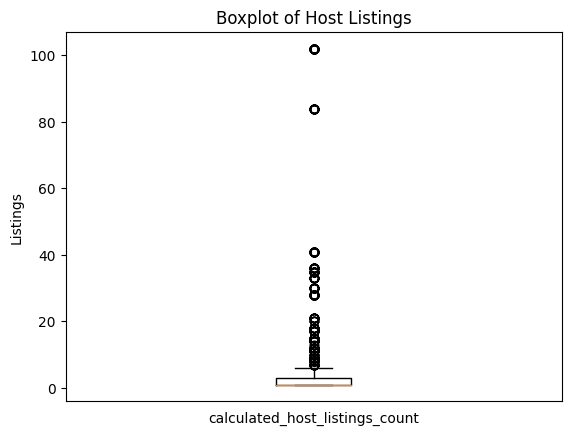

In [13]:
plt.boxplot(airbnb['calculated_host_listings_count'])
plt.title("Boxplot of Host Listings")
plt.ylabel("Listings")
plt.xlabel("calculated_host_listings_count")
plt.xticks([])
plt.show()

There are a couple hosts with an extreme number of listings (good for them!), their number of listings may have influence on the rest of their listing attributes, and as such we will remove them. The goal in doing this is so that the summary statistics will be more robust and representative of the majority of the data. Potentially removing any leveraging bias for any models we decide to build.

In [14]:
airbnb.groupby("host_id")['calculated_host_listings_count'].aggregate("max").sort_values(ascending=False)

host_id
227662329    102
231663454     84
349804247     41
2502595       41
600607        36
            ... 
67679957       1
67690876       1
68244761       1
68340002       1
503764383      1
Name: calculated_host_listings_count, Length: 3319, dtype: int64

The two hosts have over double the amount of listings as the host with the third highest amount of listings. Quite amazing, however not for our analyses.

In [37]:
outliers = airbnb.groupby("host_id")['calculated_host_listings_count'].aggregate("max").nlargest(2).index

to_drop = []
for host_id in outliers:
    print(host_id)
    to_drop.append(int(host_id))

227662329
231663454


In [47]:
airbnb.drop(airbnb.loc[airbnb['host_id'].isin(to_drop)].index, inplace=True)

# Analysis

Analyze the data to gain a better understanding of it and locate any emerging trends.

In [48]:
airbnb.head()

,id,host_id,listing_url,last_scraped,name,description,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,calculated_host_listings_count
0,13358,52116,https://www.airbnb.com/rooms/13358,2023-03-14,Designer Styled One Bedroom Downtown Vancouver,<b>The space</b><br />This suites central loca...,West End,49.28201,-123.12669,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Freezer"", ""Heating"", ""Toaster"", ""Extra pillo...",$157.00,2,90,212,443,2010-06-22,4.68,1
1,13490,52467,https://www.airbnb.com/rooms/13490,2023-03-14,Vancouver's best kept secret,This apartment rents for one month blocks of t...,Kensington-Cedar Cottage,49.25622,-123.06607,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Freezer"", ""Books and reading material"", ""Pri...",$150.00,30,180,152,96,2011-06-02,4.92,1
2,14267,56030,https://www.airbnb.com/rooms/14267,2023-03-14,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",Kensington-Cedar Cottage,49.24922,-123.08139,Entire home,Entire home/apt,4,1 bath,1.0,2.0,"[""Heating"", ""Smoke alarm"", ""Stove"", ""Coffee ma...",$150.00,3,7,0,34,2010-10-03,4.76,1
3,14424,56709,https://www.airbnb.com/rooms/14424,2023-03-14,Spacious one-bedroom in sought-after Strathcona,<b>The space</b><br />Welcome to Strathcona --...,Downtown Eastside,49.27921,-123.08835,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,"[""Freezer"", ""Shared backyard \u2013 Fully fenc...",$110.00,30,1125,70,265,2010-02-15,4.69,4
4,16254,63238,https://www.airbnb.com/rooms/16254,2023-03-14,Close to PNE/Hastings Park Garden level suite,2 Bedroom garden level guest suite.(lower leve...,Hastings-Sunrise,49.27721,-123.04086,Entire guest suite,Entire home/apt,4,1 bath,2.0,3.0,"[""Books and reading material"", ""Heating"", ""Toa...",$350.00,3,31,194,7,2018-08-04,4.57,1


In [49]:
# Summary statistics of the quantitative features of the dataset
airbnb.drop(['id', 'host_id'], axis=1).describe()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000
mean,49.263063,-123.110109,3.593363,1.607965,1.960841,14.063274,566.165929,128.107301,45.572124,4.764381,3.862611
std,0.020314,0.037828,1.991384,0.897405,1.161459,28.983601,480.672404,113.777850,71.287140,0.446717,7.394784
min,49.202960,-123.217570,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,49.250340,-123.128700,2.000000,1.000000,1.000000,2.000000,65.000000,28.000000,5.000000,4.710000,1.000000
50%,49.269181,-123.112090,3.000000,1.000000,2.000000,3.000000,365.000000,94.000000,18.000000,4.870000,1.000000
75%,49.279133,-123.087515,4.000000,2.000000,2.000000,30.000000,1125.000000,213.000000,57.000000,5.000000,3.000000
max,49.294360,-123.023680,16.000000,10.000000,13.000000,399.000000,1125.000000,365.000000,863.000000,5.000000,41.000000


Distribution of room types.

In [50]:
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

room_type
Entire home/apt    3718
Hotel room            3
Private room        785
Shared room          14
Name: id, dtype: int64

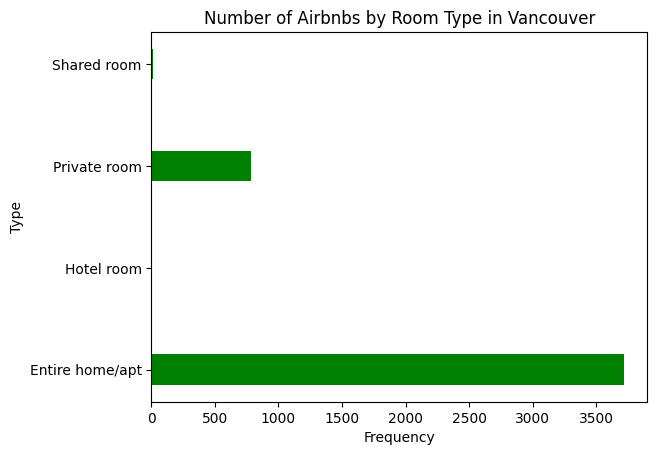

In [51]:
room_types = airbnb.groupby("room_type")["id"].aggregate("count")
plt.barh(room_types.index, room_types, color="green", height=0.3)
plt.title("Number of Airbnbs by Room Type in Vancouver")
plt.xlabel("Frequency")
plt.ylabel("Type")
room_types

In [ ]:
plt.hist(airbnb["review_scores_rating"])
plt.title('Airbnb Ratings in Vancouver')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualization

Plot findings on a read-world map using latitude and longitude coordinates with the Folium module.

In [55]:
# map_data = airbnb.sort_values("review_scores_value", ascending=False).head()
map_data = airbnb_raw.head(50)
map_figure = folium.Map([map_data.latitude.mean(), map_data.longitude.mean()], zoom_start=12)

def html_popup(row):
    name = map_data['name'].iloc[row]
    neighbourhood = map_data['neighbourhood_cleansed'].iloc[row]
    rate = map_data['review_scores_rating'].iloc[row]
    url = map_data['listing_url'].iloc[row]
    price = map_data['price'].iloc[row]
    min_nights = map_data['minimum_nights'].iloc[row]
    accommodates = map_data['accommodates'].iloc[row]
    lat = map_data['latitude'].iloc[row]
    lon = map_data['longitude'].iloc[row]
    scraped = map_data['last_scraped'].iloc[row]
    
    html = f"""
    <div style="width: 20em; line-height: 0.5em;">
        <h4 style="color: darkred;">{name}</h4>
        <h5>{neighbourhood}</h5>
        <h6>{str(rate)} Stars</h6>
        <h6>{str(price)} / Night</h6>
        <p>{min_nights} Nights Minimum</p>
        <p>Accommodates {accommodates}</p>
        <br>
        <div style="text-align: right;">
            <a href={url}>Show Listing on Airbnb</a>
            <p>Last updated {scraped}</p>
        </div>
    </div>
    """
    return html

for index, listing in map_data.iterrows():
    folium.Marker([listing['latitude'], listing['longitude']],
                        popup = html_popup(index),
                        icon = folium.Icon(icon="house", prefix="fa", color="red"),
                        tooltip = listing["name"],
                       ).add_to(map_figure)

map_figure

In [ ]:
map_figure.save('../results/index.html')